In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt

# Agrupamiento jerarquico
El agrupamiento jerarquico es un metodo descriptivo, cuyo objetivo es crear grupos de individuos buscando que se cumplan las siguientes condiciones:
1. Son grupos muy homogeneos dentro de si.
2. Son muy heteregeneos dentro de ellos.

En el metodo jerarquico se realiza mediante los siguientes pasos:
1.  Se calcula la matriz de distancia entre individuos
2. Se agrupan los individuos que tengan la menor distancia entre ellos.
3. Se repite el paso 1 y 2 hasta lograr tener a todos los individuos en 1 grupo.

Para lograr este algoritmo se necesitan dos medidas importantes:
1. Una medida de distancia entre individuos
2. Una medida de distancia entre grupos de individuos

# Distancias usadas entre individuos
Sea $x=(x_1, \ldots, x_p)$ y $y=(y_1, \ldots, y_p)$ dos individuos con sus vectores de variables observadas (todas cuantitativas) se definen las siguientes distancias:
1. Distancia [Euclidiana](https://es.wikipedia.org/wiki/Distancia_euclidiana):
$$D(x,y)=\sqrt{\sum_{i=1}^p (x_i-y_i)^2}=\sqrt{(x-y)^T(x-y)}$$
2. Distancia de [Mahalanobis](https://es.wikipedia.org/wiki/Distancia_de_Mahalanobis)
 $$D(x,y)=\sqrt{(x-y)^T\Sigma^{-1}(x-y)}$$
3. Distancia de [Manhattan](https://es.wikipedia.org/wiki/Geometr%C3%ADa_del_taxista)  
$$D(x,y)=\sum_{i=1}^p |x_i-y_i|$$

4. Distancia de [Minkowski](https://es.qwe.wiki/wiki/Minkowski_distance)
$$D(x,y)=\left(\sum_{i=1}^p |x_i-y_i|^p\right)^{\frac{1}{p}}$$

# Medida de similaridad
Sea $r$ y $s$ dos conjuntos (cluster) de $k$ y $l$ individuos, entonces las siguientes medidas de similaridad se definen entre los grupos (cluster):

1. Enlace simple: 
$$D_{rs}=min\{D(X_r, Y_s)\}$$
1. Enlace completo: 
$$D_{rs}=max\{D(X_r, Y_s)\}$$
1. Enlace promedio: 
$$D_{rs}=\frac{1}{lk}\sum_{rs}D(X_r, Y_s)$$
1. Enlace centroide: 
$$D_{rs}=D(\bar{X}_r, \bar{Y}_s)$$
1. Metodo de Ward: 
$$D_{rs}=\sqrt{\frac{2kl}{k+l}}\cdot||\bar{X}_r- \bar{Y}_s||$$

In [23]:
url="https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/Delitos_Colombia.csv"
datos=pd.read_csv(url, sep=";", index_col=0)
datos

,Delitos_Sexuales,Homicidios,Transito,Asalto,Intrafamiliar,Poblacion
Departamento,,,,,,
Antioquia,2163,375,5079,11897,8205,6690977
Atlantico,1042,85,1928,59,3659,2546138
Bogota_D.C.,4211,1463,725,2725,19811,8181047
Bolivar,944,28,922,3812,2085,2171558
Boyaca,517,95,1167,4084,2707,1281979
Caldas,443,65,1248,2243,975,993870
Caqueta,221,18,121,654,449,496262
Cauca,420,62,861,2378,1475,1416145
Cesar,561,44,842,2757,1402,1065637


In [24]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

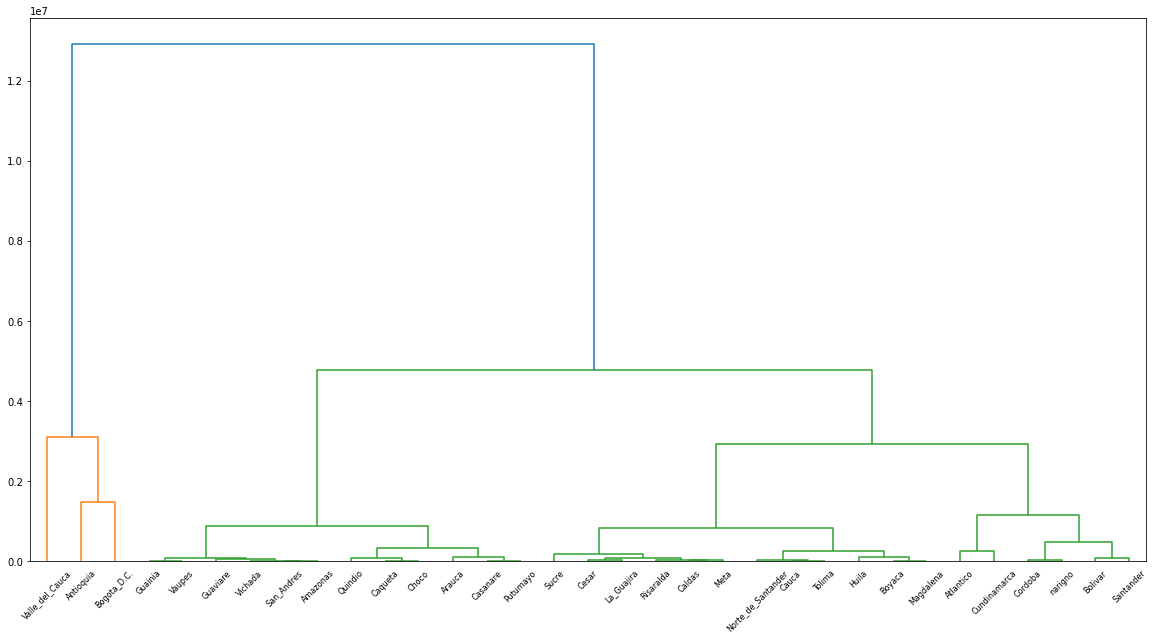

In [25]:
plt.rcParams["figure.figsize"] = (20,10)
dendogram=sch.dendrogram(sch.linkage(datos, method='ward',metric="euclidean"),labels=datos.index)

In [42]:
Cluster=dendogram.get('leaves_color_list')
Labels=dendogram.get('ivl')
for i in range(len(datos)):
    datos['Cluster'][Labels[i]]=Cluster[i]
datos

<ipython-input-42-066c6a3c410b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['Cluster'][Labels[i]]=Cluster[i]


,Delitos_Sexuales,Homicidios,Transito,Asalto,Intrafamiliar,Poblacion,Cluster
Departamento,,,,,,,
Antioquia,2163,375,5079,11897,8205,6690977,C1
Atlantico,1042,85,1928,59,3659,2546138,C2
Bogota_D.C.,4211,1463,725,2725,19811,8181047,C1
Bolivar,944,28,922,3812,2085,2171558,C2
Boyaca,517,95,1167,4084,2707,1281979,C2
Caldas,443,65,1248,2243,975,993870,C2
Caqueta,221,18,121,654,449,496262,C2
Cauca,420,62,861,2378,1475,1416145,C2
Cesar,561,44,842,2757,1402,1065637,C2


## Estandarizar los datos

In [6]:
from sklearn.preprocessing import StandardScaler
datosescalados=StandardScaler(with_mean=True, with_std=True).fit(datos)
datosnuevos=datosescalados.transform(datos)
datosnuevos

array([[ 1.86500696e+00,  1.01240803e+00,  2.89170883e+00,
         3.07253846e+00,  1.73801004e+00,  2.87917032e+00],
       [ 4.84610753e-01, -1.21972587e-01,  5.58547037e-01,
        -9.32878984e-01,  4.52408787e-01,  5.75738481e-01],
       [ 4.38690834e+00,  5.26829119e+00, -3.32215781e-01,
        -3.08310942e-02,  5.02016758e+00,  3.70725428e+00],
       [ 3.63933832e-01, -3.44937054e-01, -1.86346890e-01,
         3.36958124e-01,  7.28419967e-03,  3.67571288e-01],
       [-1.61872753e-01, -8.28560141e-02, -4.93634147e-03,
         4.28990017e-01,  1.83184767e-01, -1.26798841e-01],
       [-2.52996143e-01, -2.00205734e-01,  5.50402074e-02,
        -1.93917022e-01, -3.06621958e-01, -2.86911078e-01],
       [-5.26366311e-01, -3.84053627e-01, -7.79448318e-01,
        -7.31559218e-01, -4.55373885e-01, -5.63449228e-01],
       [-2.81318277e-01, -2.11940705e-01, -2.31514415e-01,
        -1.48239428e-01, -1.65222788e-01, -5.22381073e-02],
       [-1.07691278e-01, -2.82350537e-01, -2.455

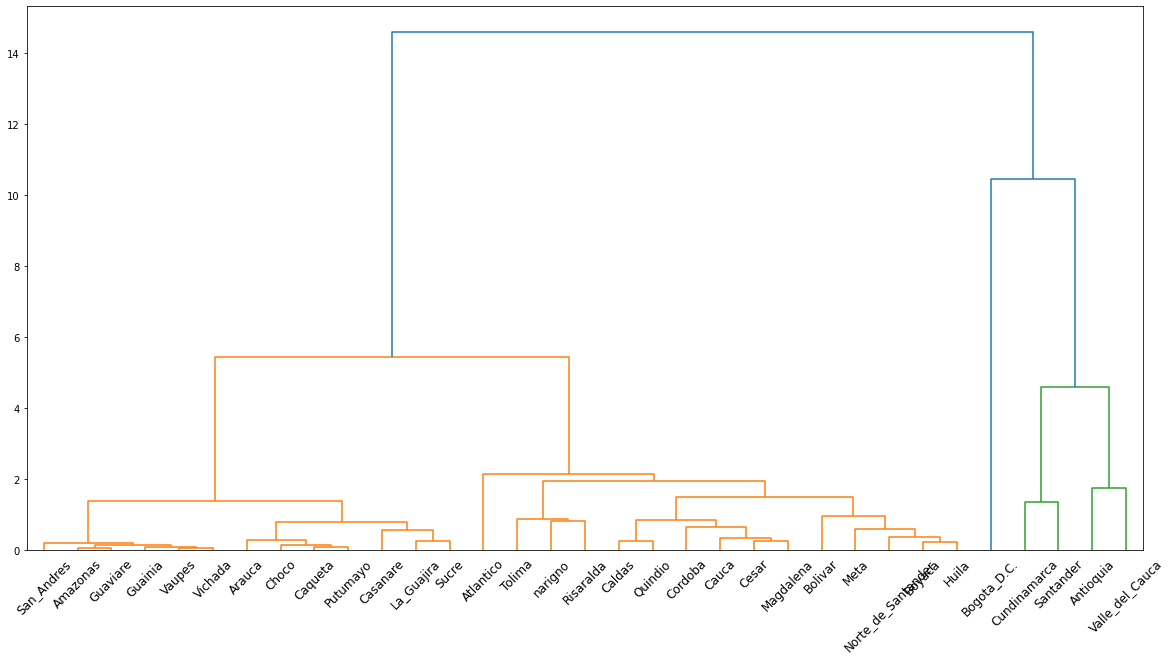

In [7]:
plt.rcParams["figure.figsize"] = (20,10)
dendogram=sch.dendrogram(sch.linkage(datosnuevos, method='ward',metric="euclidean"),labels=datos.index,leaf_font_size=12)

In [8]:
sch.centroid(sch.linkage(datosnuevos, method='ward',metric="euclidean"))

array([[17.        , 19.        ,  2.44994126,  2.        ],
       [ 0.        ,  3.        ,  2.44995555,  2.        ],
       [ 1.        , 33.        ,  3.24042146,  3.        ],
       [11.        , 14.        ,  3.32802792,  2.        ],
       [ 8.        , 22.        ,  3.35622891,  2.        ],
       [12.        , 16.        ,  3.75580218,  2.        ],
       [ 6.        , 35.        ,  4.33556479,  3.        ],
       [24.        , 26.        ,  4.38453613,  2.        ],
       [ 7.        ,  9.        ,  4.47230486,  2.        ],
       [18.        , 36.        ,  4.74348319,  3.        ],
       [10.        , 40.        ,  5.0990902 ,  3.        ],
       [13.        , 15.        ,  6.40771191,  2.        ],
       [ 4.        , 34.        ,  6.90450293,  4.        ],
       [ 2.        , 25.        ,  6.9072006 ,  2.        ],
       [21.        , 37.        ,  6.90829248,  3.        ],
       [38.        , 44.        ,  7.97164317,  7.        ],
       [23.        , 32.

In [12]:
ag= AgglomerativeClustering(distance_threshold=None, n_clusters=2)
grupos=ag.fit(datos)
grupos.labels_
datos['Cluster']=grupos.labels_
datos

,Delitos_Sexuales,Homicidios,Transito,Asalto,Intrafamiliar,Poblacion,Cluster
Departamento,,,,,,,
Antioquia,2163,375,5079,11897,8205,6690977,1
Atlantico,1042,85,1928,59,3659,2546138,0
Bogota_D.C.,4211,1463,725,2725,19811,8181047,1
Bolivar,944,28,922,3812,2085,2171558,0
Boyaca,517,95,1167,4084,2707,1281979,0
Caldas,443,65,1248,2243,975,993870,0
Caqueta,221,18,121,654,449,496262,0
Cauca,420,62,861,2378,1475,1416145,0
Cesar,561,44,842,2757,1402,1065637,0


In [22]:
#!pip install rpy2

In [21]:
import rpy2
%load_ext rpy2.ipython

# Ejemplo de dendrograma con los datos de la clase


In [ ]:
Datos <- read.csv("C:/Users/nelso/Downloads/Datos.csv", row.names=1)

library(factoextra)
library(cluster)
cor(Datos)
distancia=get_dist(Datos,stand = T ,method = "pearson")
distancia

fviz_dist(distancia)
arbol=hclust(distancia, method = "ward.D2" )
plot(arbol)


cluster <- cutree(arbol, k = 3)
cluster

fviz_dend(arbol, k=3, rect=T)

datos=data.frame(Datos, cluster)

aggregate(.~cluster, data=datos, FUN=mean)

# Cluster de departamentos

In [ ]:
%%R
library(cluster)
library(factoextra)


## Cargar delitos de colombia
#### Seleccionar variables cuantitativas
url="https://raw.githubusercontent.com/Cruzalirio/Ucentral/master/Bases/Delitos_Colombia.csv"
datos=read.csv(url, sep=";", row.names = 1)

## Calcular distancia


distancia=get_dist(datos, stand = TRUE, method = "pearson")
distancia


fviz_dist(distancia)
arbol=hclust(distancia, method = "complete" )
plot(arbol)

plot(arbol, cex = 0.6)

arbol=agnes(distancia, diss=T, method = "complete" )
plot(arbol)
a
b

arbol$ac

### Como escoger el metodo de enlace
library(purrr)
metodos <- c( "average", "single", "complete", "ward")
names(metodos) <- c( "average", "single", "complete", "ward")

# function to compute coefficient
escogermetodo <- function(x) {
  agnes(distancia, diss=T, method = x)$ac
}

escogermetodo(metodos)
map_dbl(metodos, escogermetodo)   

### Se escoge el metodo de Ward
arbol=agnes(distancia, diss=T, method = "ward" )
plot(arbol)
a
b

#### Cortar el arbol
cluster <- cutree(arbol, k = 5)
cluster

rect.hclust(arbol, k = 3, border = 2:10)

fviz_dend(arbol, k=3, rect=T)


#### Algunos elementos para escoger el número de grupos

library("NbClust")
set.seed(123)
indicesCluster <- NbClust(datos,diss=distancia,distance=NULL,
                          min.nc = 2, max.nc = 10, 
                          method = "ward.D2", index ="all") 

factoextra::fviz_nbclust(indicesCluster)

### Indice de silueta
arbol=hcut(distancia, k=2,isdiss=T, hc_func = "agnes",
           hc_method = "ward.D2", hc_metric="pearson")
fviz_silhouette(arbol)
arbol$silinfo$widths



R[write to console]: Error in library(factoextra) : there is no package called ‘factoextra’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library




Error in library(factoextra) : there is no package called ‘factoextra’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library
